# THS

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import warnings
from IPython.display import Image

warnings.filterwarnings("ignore")
orbits = np.genfromtxt(r"C:\Users\kevin\OneDrive\Email attachments\Escritorio\nbody_sh1\outTHS2.txt", delimiter = ' ', usecols = range(0,7), invalid_raise=False)

In [15]:
b_ = []
n=200

# Crear 200 matrices similares a b_1 y b_2
for _ in range(n):
    matriz = np.zeros(shape=(int(len(orbits)/n),3))
    b_.append(matriz)

for j in range(n):
    for i in range(int(len(orbits)/n)):
        b_[j][i][0] = orbits[i*n+j][1]
        b_[j][i][1] = orbits[i*n+j][2]
        b_[j][i][2] = orbits[i*n+j][3]
        
print(b_[2])
print((len(b_[1])))

[[-0.91463042  1.0814673  -1.66988385]
 [-0.91415946  1.08115855 -1.66944232]
 [-0.91308086  1.08045152 -1.66843139]
 [-0.91118154  1.07920685 -1.66665214]
 [-0.90844019  1.0774111  -1.66408609]
 [-0.90508604  1.07521512 -1.66094968]
 [-0.90088114  1.07246405 -1.65702281]
 [-0.89561915  1.06902442 -1.65211675]
 [-0.89016602  1.06546353 -1.64704192]
 [-0.88361911  1.06119351 -1.64096203]
 [-0.87626344  1.05640288 -1.63414796]
 [-0.86799856  1.05102917 -1.62651318]
 [-0.85909601  1.04525215 -1.61831524]
 [-0.84925935  1.03888351 -1.60928886]
 [-0.83858604  1.03199223 -1.59953326]
 [-0.82693957  1.02449757 -1.588935  ]
 [-0.81454807  1.0165546  -1.57771366]
 [-0.80115236  1.00800689 -1.56564799]
 [-0.78691212  0.99896789 -1.55289733]
 [-0.77156724  0.98928646 -1.53924656]
 [-0.7552984   0.97909304 -1.52487655]
 [-0.73811118  0.96840736 -1.50981203]
 [-0.71970843  0.95706387 -1.49381722]
 [-0.70033382  0.9452348  -1.47713099]
 [-0.67971157  0.9327767  -1.45954395]
 [-0.65785069  0.9197219 

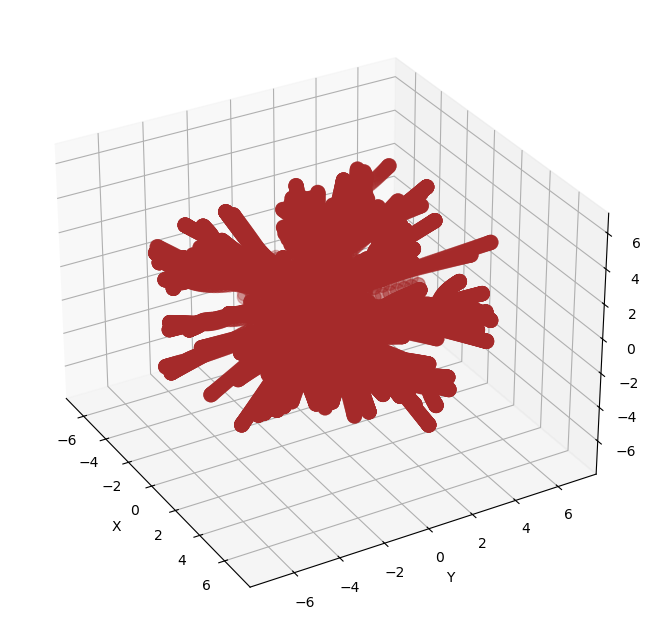

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
   
#b_1 = np.zeros(shape = (int(len(orbits)/200), 3))
#b_2 = np.zeros(shape = (int(len(orbits)/200), 3))

#for i in range(int(len(orbits)/200)):
    #for j in range(200):
        #b_[j][i][0] = orbits[i*200][1]
        #b_[j][i][1] = orbits[i*200][2]
        #b_[j][i][2] = orbits[i*200][3]

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.set_xlim(b_2[:,0].min(),b_2[:,0].max())
#ax.set_ylim(b_2[:,1].min(),b_2[:,1].max())
#ax.set_zlim(b_2[:,2].min(),b_2[:,2].max())

for i in range(n):
    ax.scatter(b_[i][:,0], b_[i][:,1], b_[i][:,2], s = 100, color = 'brown')

ax.view_init(30, -30)
plt.savefig('THS.png', dpi = 300)
plt.show()

# Dispendious animation

In [17]:
for i in tqdm(range(len(b_[1]))):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(projection = '3d')
    
    for j in range(n):
        ax.scatter(b_[j][i,0], b_[j][i,1], b_[j][i,2], s = 100, color = 'blue')
    
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5,5)
    
    ax.set_title('THS')

    ax.view_init(30, -30)
    
    plt.savefig(f"{i}.png")
    plt.close()
    
from PIL import Image
import os

images = [Image.open(f"{i}.png") for i in range(len(b_[1]))]
images[0].save('THS.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

for i in range (len(b_[1])):
    os.remove(f"{i}.png")

100%|██████████| 76/76 [02:29<00:00,  1.97s/it]


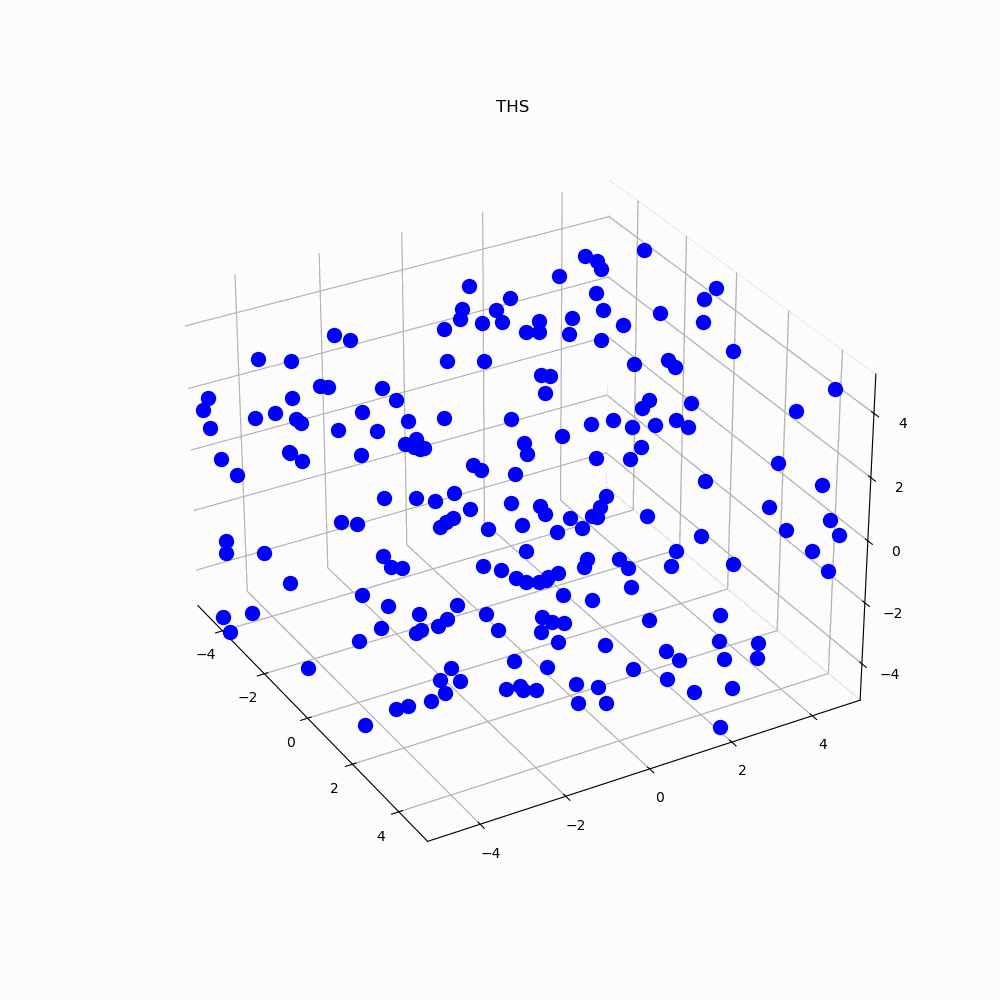

In [18]:
from IPython.display import Image

Image(filename='THS.gif')

# Fast animation

In [ ]:
import numpy as np
import matplotlib
# matplotlib.use("Agg") # useful for a webserver case where you don't want to ever visualize the result live.
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, PillowWriter

# Change to reflect your file location!
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\spsha\\Desktop\\ffmpeg-4.4-full_build\\bin\\ffmpeg.exe'


# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='2 Body Problem', artist='Edoardo Santo')
writer = PillowWriter(fps=15, metadata=metadata)
#writer = FFMpegWriter(fps=15, metadata=metadata)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (10,10))

line1, = ax.plot([],[],[], color = 'red')
line2, = ax.plot([],[],[], color = 'blue')

ax.set_xlim(b_2[:,0].min()-0.01,b_2[:,0].max()+0.01)
ax.set_ylim(b_2[:,1].min()-0.01,b_2[:,1].max()+0.01)
ax.set_zlim(b_2[:,2].min()-0.01,b_2[:,2].max()+0.01)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Pluto vs Sun orbit')

ax.scatter(0,0,0, s = 100, color = 'brown')

ax.view_init(30, -30)

xlist1 = []
xlist2 = []
ylist1 = []
ylist2 = []
zlist1 = []
zlist2 = []

with writer.saving(fig, "Pluto vs Sun orbit, lineplot.gif", 100):
    for i in tqdm(range(len(b_1))):
        
        xlist1.append(b_1[i][0])
        ylist1.append(b_1[i][1])
        zlist1.append(b_1[i][2])
        
        xlist2.append(b_2[i][0])
        ylist2.append(b_2[i][1])
        zlist2.append(b_2[i][2])
        
        line1.set_data(xlist1, ylist1)
        line1.set_3d_properties(zlist1)
        
        line2.set_data(xlist2, ylist2)
        line2.set_3d_properties(zlist2)
        
        writer.grab_frame()
        #plt.cla()